# Script Principal du projet 

 * Le fichier grid permet de faire l'ensemble du pre-processing. Il n'est pas détaillé ici. 
 
 * Les données sont sauvegardées dans le fichier storage, il faut une application comme db-browser pour le consulter et faire des requêtes dessus. 
 
 * Le fichier tkteach nous a permis de faire la labelisation
 

Commençons par importer les packages nécessaires

In [1]:
#### Librairie
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
#### Nos fonctions : 
    
from utils import *
from db_config import *

#### Nos fonctions par modèle
from KNN import KNN_Model
from RF import RandomForest_Model
from Linear_SVC import SVC_Model

# Premiers test avec le data set complet
On retire les deux dernières colonnes qui sont un doublon des espaces et l'apostrophe
pour lequel il n'y a qu'une seule donnée.

In [2]:
all_categories = [el for el in selectAllCategories()][0:-2]

x_all, y_all = createDataSet(all_categories)

print(x_all.shape)
print(y_all.shape)


(3733, 784)
(3733,)


## Création des dataset train et test

Les jeux de données split ne sont pas utilisés dans un premier temps, puisque le split est effectué dans chaque fonction du modèle testé. La ligne suivante permet simplement d'avoir un aperçu des données avec lesquelles travailent les fonctions. 

In [3]:

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(x_all, y_all, test_size=0.33,
                                                                    random_state=2, shuffle=True)

print("X_train_all :", X_train_all.shape)
print("X_test_all :", X_test_all.shape)
print("y_train_all :", y_train_all.shape)
print("y_test_all :", y_test_all.shape)

plotNumberOfOccurenciesByClasses(y_test_all)

X_train_all : (2501, 784)
X_test_all : (1232, 784)
y_train_all : (2501,)
y_test_all : (1232,)


## Résultats obtenus pour les différents modèles
Toutes les fonctions d'entraînement des modèles font de la cross-validation et le cas 
échéant estiment les hyper-paramètres et retourne le meilleur modèle. 

Pour chaque fonction, un split est réalisé, de manière à ce que l'estimation des modèles ne se fasse pas sur l'ensemble du dataset. 

--- Cross validation pour les KNN --- 
---
accuracy moyenne pour k = 1: 0.542584860557769
---
---
accuracy moyenne pour k = 2: 0.5193960159362551
---
---
accuracy moyenne pour k = 3: 0.520199203187251
---
---
accuracy moyenne pour k = 4: 0.5181992031872511
---
---
accuracy moyenne pour k = 5: 0.513399203187251
---
---
accuracy moyenne pour k = 6: 0.5110023904382469
---
---
accuracy moyenne pour k = 7: 0.503403984063745
---
---
accuracy moyenne pour k = 8: 0.501405577689243
---
---
accuracy moyenne pour k = 9: 0.4954103585657371
---
---
accuracy moyenne pour k = 10: 0.49380717131474106
---
---
accuracy moyenne pour k = 11: 0.49380398406374504
---
---
accuracy moyenne pour k = 12: 0.493802390438247
---
---
accuracy moyenne pour k = 13: 0.48860398406374494
---
---
accuracy moyenne pour k = 14: 0.48380557768924304
---
---
accuracy moyenne pour k = 15: 0.4830103585657371
---
cross validation terminée
--- Plot de {metric} en fonction de K ---


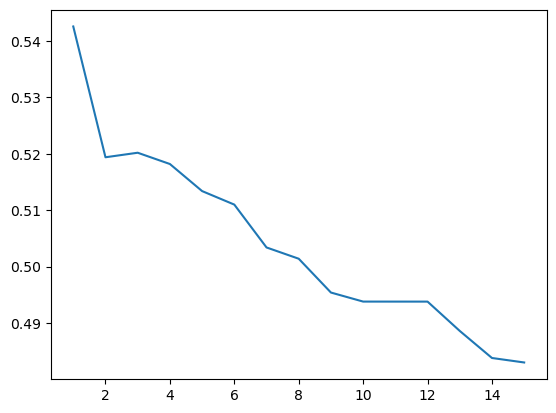

--- Le meileur modèle est obtenu pour k = 1 ---
--- Matrice de confusion pour le modèle k = 1 ---


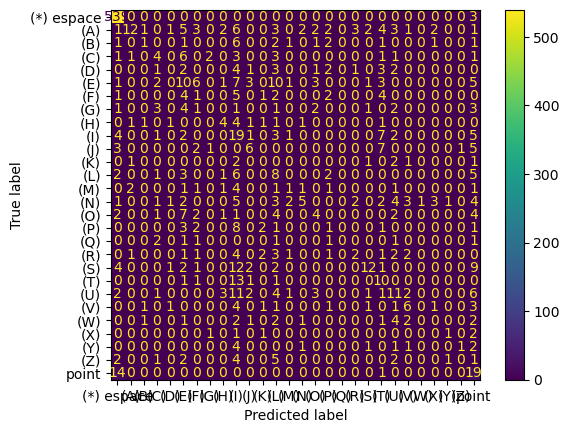

--- split data set into train and test --- 
--- start cross validation Random Forest --- 
---
--- accuracy moyenne pour split = 3 et depth = 2 ---
0.4530179640718563
---
---
--- accuracy moyenne pour split = 3 et depth = 3 ---
0.45661636726546906
---
---
--- accuracy moyenne pour split = 3 et depth = 4 ---
0.4658131736526946
---
---
--- accuracy moyenne pour split = 4 et depth = 2 ---
0.4538179640718563
---
---
--- accuracy moyenne pour split = 4 et depth = 3 ---
0.45741716566866264
---
---
--- accuracy moyenne pour split = 4 et depth = 4 ---
0.46381636726546904
---
---
--- accuracy moyenne pour split = 5 et depth = 2 ---
0.4530195608782435
---
---
--- accuracy moyenne pour split = 5 et depth = 3 ---
0.45621796407185633
---
---
--- accuracy moyenne pour split = 5 et depth = 4 ---
0.4610171656686627
---
--- cross validation terminée ---
--- La meilleur accuracy est 0.4658131736526946 --- 
 Pour split = 3 et depth = 4


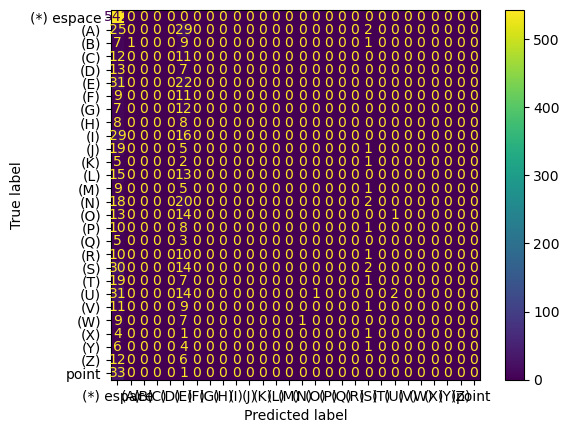

---  Cross Validation : Optimisation des hyperparamètres avec GridCV --- 
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................C=1, kernel=rbf; total time=   1.2s
[CV] END ....................................C=1, kernel=rbf; total time=   1.3s
[CV] END ....................................C=1, kernel=rbf; total time=   1.3s
[CV] END ....................................C=1, kernel=rbf; total time=   1.4s
[CV] END ....................................C=1, kernel=rbf; total time=   1.4s
[CV] END ...................................C=1, kernel=poly; total time=   0.9s
[CV] END ...................................C=1, kernel=poly; total time=   1.1s
[CV] END ...................................C=1, kernel=poly; total time=   1.0s
[CV] END ...................................C=1, kernel=poly; total time=   1.0s
[CV] END ...................................C=1, kernel=poly; total time=   1.0s
[CV] END ................................C=1, kernel=sig

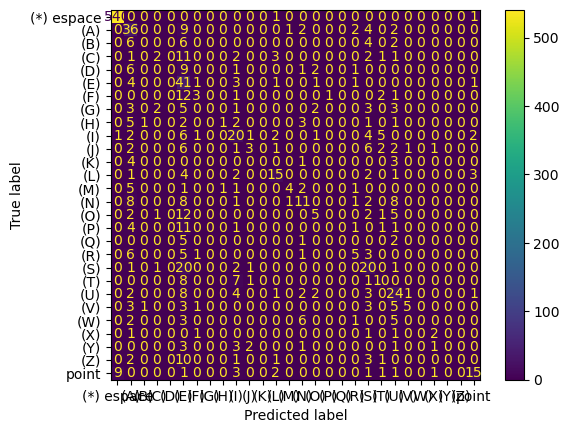

 Score Accuracy pour le meilleur modèle 
0.6185064935064936


In [4]:
best_knn_model = KNN_Model(x_all, y_all, 10, 15, 'accuracy')

best_random_forest_model = RandomForest_Model(x_all, y_all, nbreTree=100, 
                                              minDepth=2, maxDepth=4, minSplit=3,
                                              maxSplit=5, nbreCV=5, metric= "accuracy")

best_SVC_model = SVC_Model(x_all,y_all, nbreCV = 5 , C_min=1,nb_C =2)


## Matrice de confusion pour chaque catégorie de lettre, par modèle

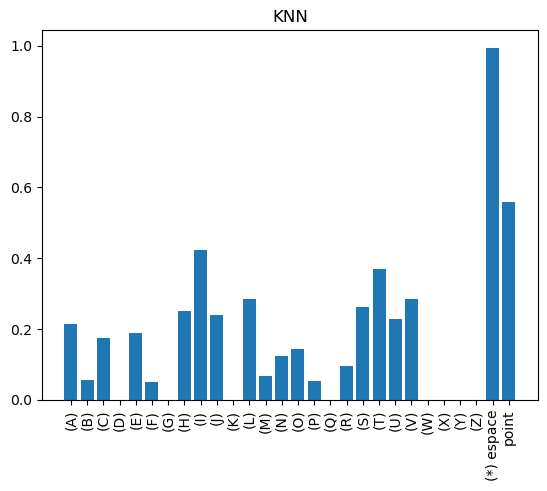

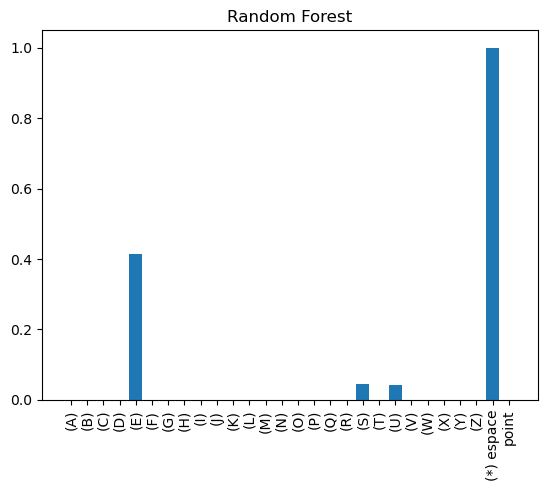

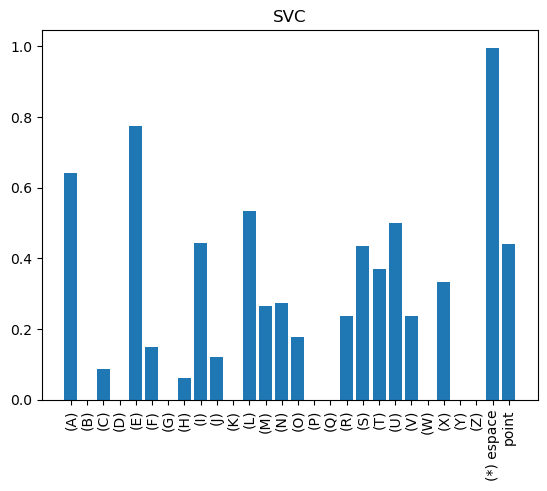

{"(1, '(A)')": 0.6428571428571429,
 "(2, '(B)')": 0.0,
 "(3, '(C)')": 0.08695652173913043,
 "(4, '(D)')": 0.0,
 "(5, '(E)')": 0.7735849056603774,
 "(6, '(F)')": 0.15,
 "(7, '(G)')": 0.0,
 "(8, '(H)')": 0.0625,
 "(9, '(I)')": 0.4444444444444444,
 "(10, '(J)')": 0.12,
 "(11, '(K)')": 0.0,
 "(12, '(L)')": 0.5357142857142857,
 "(13, '(M)')": 0.26666666666666666,
 "(14, '(N)')": 0.275,
 "(15, '(O)')": 0.17857142857142858,
 "(16, '(P)')": 0.0,
 "(17, '(Q)')": 0.0,
 "(18, '(R)')": 0.23809523809523808,
 "(19, '(S)')": 0.43478260869565216,
 "(20, '(T)')": 0.37037037037037035,
 "(21, '(U)')": 0.5,
 "(22, '(V)')": 0.23809523809523808,
 "(23, '(W)')": 0.0,
 "(24, '(X)')": 0.3333333333333333,
 "(25, '(Y)')": 0.0,
 "(26, '(Z)')": 0.0,
 "(27, '(*) espace')": 0.996309963099631,
 "(28, 'point')": 0.4411764705882353}

In [5]:
testModelForEachCat(best_knn_model, all_categories, y_test_all, X_test_all, title="KNN", plot=False)

testModelForEachCat(best_random_forest_model, all_categories, y_test_all, X_test_all, title="Random Forest", plot=False)

testModelForEachCat(best_SVC_model, all_categories, y_test_all, X_test_all, title="SVC", plot=False)


 Premières conclusions : 
    
   Quelque soit le modèle et quelques soit les hyper paramètres, on a la même accuracy
   Quand on regarde plus en détail, toutes les lettres sont très souvent prédites comme étant des espaces. 
   Problème de déséquilibre des classes. 
    
   Deux stratégies s'offrent à nous : 
    
- Ré-équilibrer les données artificiellement
- Augmenter le nombre de données (en récolter plus)
    
Dans le cadre du projet, la dernière option qui est très certainement la meilleure, n'est pas possible. 
Nous essaierons donc la première stratégie. 
    
Nous avons plusieurs solutions pour réaliser cette dernière  :
- Réduction des données à la main        
- Oversampling
- undersampling
- class weight 
- decision threshold (ne fonctionne que pour du binaire à priori)
        
    
Dans un premier temps, au regard de nos données, nous allons réduire manuellement le nombre d'espace. 
C'est une décision forte, mais qui semble nécessaire au regard de la différence d'espace par rapport 
aux autres classes.

# Données avec un nombre d'espace réduit

In [6]:
x_cut_space, y_cut_space = createDataSet(all_categories, troncSpace=1000)

# Modèles avec un nombre d'espace réduit

--- Cross validation pour les KNN --- 
---
accuracy moyenne pour k = 1: 0.45347580051527425
---
---
accuracy moyenne pour k = 2: 0.43906652557968345
---
---
accuracy moyenne pour k = 3: 0.4357034412955465
---
---
accuracy moyenne pour k = 4: 0.4299503128450497
---
---
accuracy moyenne pour k = 5: 0.42563029076186976
---
---
accuracy moyenne pour k = 6: 0.4169925469267574
---
---
accuracy moyenne pour k = 7: 0.4107586492454914
---
---
accuracy moyenne pour k = 8: 0.4073932646301067
---
---
accuracy moyenne pour k = 9: 0.39779628266470374
---
---
accuracy moyenne pour k = 10: 0.39540163783584836
---
---
accuracy moyenne pour k = 11: 0.39300009201324987
---
---
accuracy moyenne pour k = 12: 0.3930046926757453
---
---
accuracy moyenne pour k = 13: 0.38964160839160844
---
---
accuracy moyenne pour k = 14: 0.3867661943319838
---
---
accuracy moyenne pour k = 15: 0.3838930806036069
---
cross validation terminée
--- Plot de {metric} en fonction de K ---


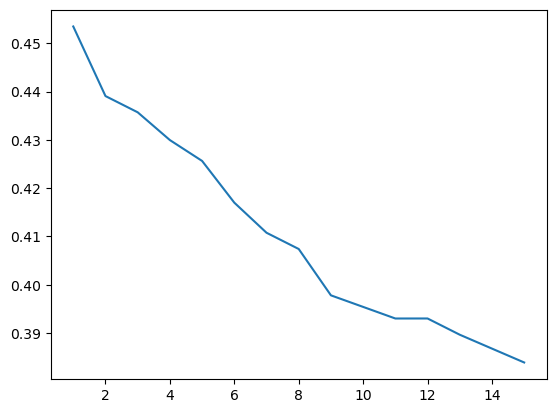

--- Le meileur modèle est obtenu pour k = 1 ---
--- Matrice de confusion pour le modèle k = 1 ---


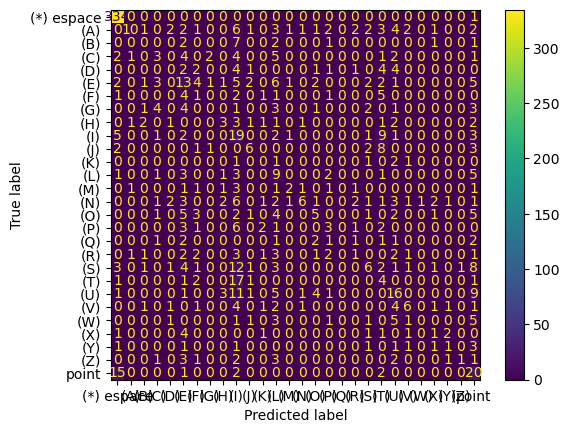

--- split data set into train and test --- 
--- start cross validation Random Forest --- 
---
--- accuracy moyenne pour split = 3 et depth = 2 ---
0.34740938018815715
---
---
--- accuracy moyenne pour split = 3 et depth = 3 ---
0.3512497694152371
---
---
--- accuracy moyenne pour split = 3 et depth = 4 ---
0.361804786939679
---
---
--- accuracy moyenne pour split = 4 et depth = 2 ---
0.34740938018815715
---
---
--- accuracy moyenne pour split = 4 et depth = 3 ---
0.349809767570559
---
---
--- accuracy moyenne pour split = 4 et depth = 4 ---
0.35700862387013466
---
---
--- accuracy moyenne pour split = 5 et depth = 2 ---
0.34836861280206605
---
---
--- accuracy moyenne pour split = 5 et depth = 3 ---
0.34836861280206605
---
---
--- accuracy moyenne pour split = 5 et depth = 4 ---
0.3627663254012175
---
--- cross validation terminée ---
--- La meilleur accuracy est 0.3627663254012175 --- 
 Pour split = 5 et depth = 4


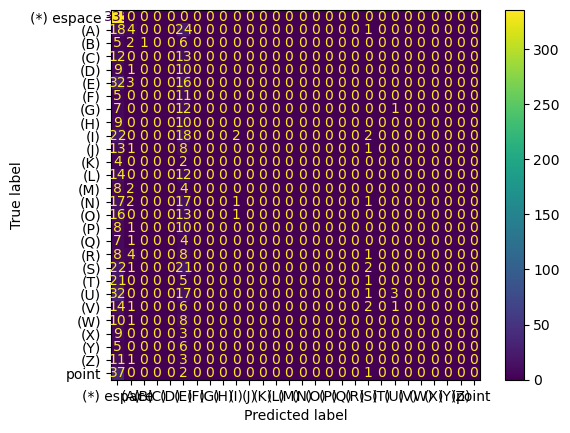

---  Cross Validation : Optimisation des hyperparamètres avec GridCV --- 
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................C=1, kernel=rbf; total time=   1.0s
[CV] END ....................................C=1, kernel=rbf; total time=   1.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.9s
[CV] END ....................................C=1, kernel=rbf; total time=   1.0s
[CV] END ....................................C=1, kernel=rbf; total time=   1.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.7s
[CV] END ...................................C=1, kernel=poly; total time=   0.9s
[CV] END ...................................C=1, kernel=poly; total time=   0.9s
[CV] END ...................................C=1, kernel=poly; total time=   0.9s
[CV] END ...................................C=1, kernel=poly; total time=   0.9s
[CV] END ................................C=1, kernel=sig

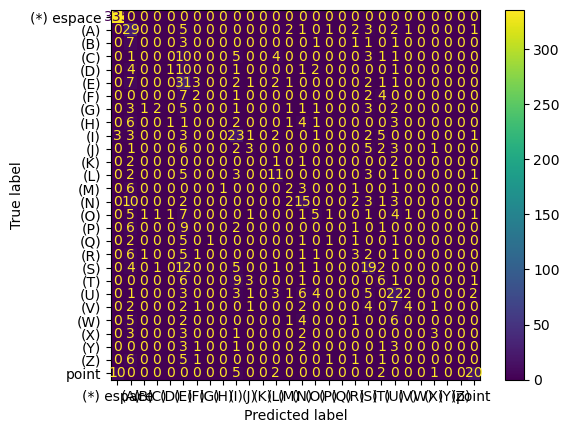

 Score Accuracy pour le meilleur modèle 
0.5199610516066212


In [7]:


best_knn_model_cut_space = KNN_Model(x_cut_space, y_cut_space, 10, 15, 'accuracy')

best_random_forest_model_cut_space = RandomForest_Model(x_cut_space, y_cut_space, 
                                                        nbreTree=100, minDepth=2, maxDepth=4,
                                                        minSplit=3, maxSplit=5, nbreCV=5, metric= "accuracy")
best_SVC_model_cut_space = SVC_Model(x_cut_space, y_cut_space, nbreCV = 5 , C_min=1 ,nb_C =2)


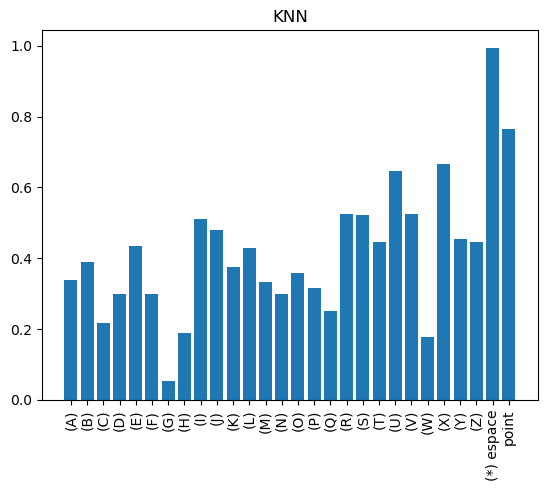

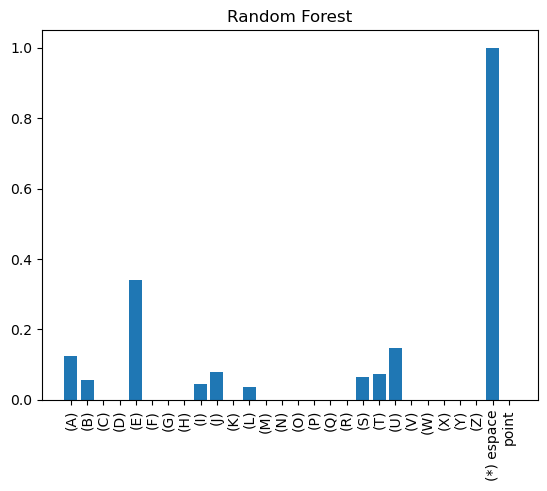

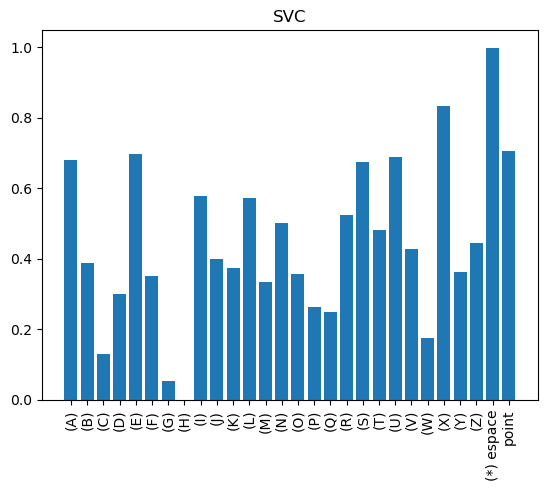

{"(1, '(A)')": 0.6785714285714286,
 "(2, '(B)')": 0.3888888888888889,
 "(3, '(C)')": 0.13043478260869565,
 "(4, '(D)')": 0.3,
 "(5, '(E)')": 0.6981132075471698,
 "(6, '(F)')": 0.35,
 "(7, '(G)')": 0.05263157894736842,
 "(8, '(H)')": 0.0,
 "(9, '(I)')": 0.5777777777777777,
 "(10, '(J)')": 0.4,
 "(11, '(K)')": 0.375,
 "(12, '(L)')": 0.5714285714285714,
 "(13, '(M)')": 0.3333333333333333,
 "(14, '(N)')": 0.5,
 "(15, '(O)')": 0.35714285714285715,
 "(16, '(P)')": 0.2631578947368421,
 "(17, '(Q)')": 0.25,
 "(18, '(R)')": 0.5238095238095238,
 "(19, '(S)')": 0.6739130434782609,
 "(20, '(T)')": 0.48148148148148145,
 "(21, '(U)')": 0.6875,
 "(22, '(V)')": 0.42857142857142855,
 "(23, '(W)')": 0.17647058823529413,
 "(24, '(X)')": 0.8333333333333334,
 "(25, '(Y)')": 0.36363636363636365,
 "(26, '(Z)')": 0.4444444444444444,
 "(27, '(*) espace')": 0.9981549815498155,
 "(28, 'point')": 0.7058823529411765}

In [8]:
testModelForEachCat(best_knn_model_cut_space, all_categories, y_test_all, X_test_all, title="KNN", plot=False)

testModelForEachCat(best_random_forest_model_cut_space, all_categories, y_test_all, X_test_all, title="Random Forest", plot=False)

testModelForEachCat(best_SVC_model_cut_space, all_categories, y_test_all, X_test_all, title="SVC", plot=False)

Conclusion, ça ne marche pas mieux, la plupart des lettres sont toujours prédites comme des espaces
Autre stratégie, essayer de faire de l'oversampling. Donc de créer de nouvelles données. 

# Test de ressampling avec SMOTEENN

In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
x_resampled, y_resampled = smote_enn.fit_resample(x_all, y_all)

# Modèles avec les données resamplées

In [ ]:
## Ne pas exécuter cette cellule ##

#best_knn_model_resample = KNN_Model(x_resampled, y_resampled, nbre_cv=10, k_max= 5, metric = 'accuracy')

#best_random_forest_model_resample = RandomForest_Model(x_resampled, y_resampled, 
  #                                                     nbreTree=100, minDepth=2, maxDepth=4, 
   #                                                    minSplit=3, maxSplit=5, nbreCV=5, metric= "accuracy")
#best_svc_model_resample =  SVC_Model(x_resampled, y_resampled, nbreCV = 5 , C_min=1 ,nb_C =2)


Temps de calcul très long pour les modèles, car nombre de données beaucoup trop grand

Essayons avec un nombre d'espace réduit, pour avoir un jeu de données plus petit (environ 1000 données par catégories maximum maximum)

In [10]:
from imblearn.combine import SMOTEENN
smote_enn_cut_space = SMOTEENN(random_state=0)
x_resampled_cut_space, y_resampled_cut_space = smote_enn_cut_space.fit_resample(x_cut_space, y_cut_space)

print("x_resampled_cut_space :", x_resampled_cut_space.shape)
print("y_resampled_cut_space :", y_resampled_cut_space.shape)

# mettre le fonction "plotNumberOfOccurenciesByClasses" pour afficher la proportion des lettres
plotNumberOfOccurenciesByClasses(y_resampled_cut_space)

x_resampled_cut_space : (25071, 784)
y_resampled_cut_space : (25071,)


## Test des modèles avec train et test resamplé. 

--- Cross validation pour les KNN --- 
---
accuracy moyenne pour k = 1: 0.9876170623103322
---
---
accuracy moyenne pour k = 2: 0.9719593933463797
---
---
accuracy moyenne pour k = 3: 0.9616006906038175
---
---
accuracy moyenne pour k = 4: 0.9465382242831618
---
---
accuracy moyenne pour k = 5: 0.9329048611701977
---
cross validation terminée
--- Plot de {metric} en fonction de K ---


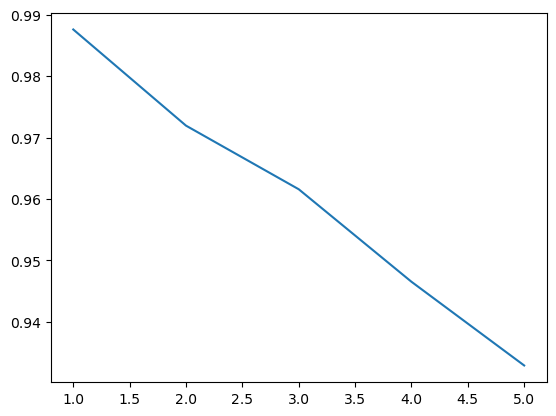

--- Le meileur modèle est obtenu pour k = 1 ---
--- Matrice de confusion pour le modèle k = 1 ---


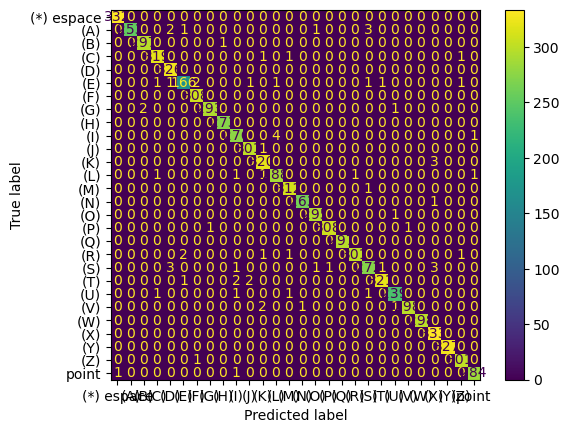

--- split data set into train and test --- 
--- start cross validation Random Forest --- 
---
--- accuracy moyenne pour split = 3 et depth = 2 ---
0.23009999787351681
---
---
--- accuracy moyenne pour split = 3 et depth = 3 ---
0.3426206247607706
---
---
--- accuracy moyenne pour split = 3 et depth = 4 ---
0.4247175321453381
---
---
--- accuracy moyenne pour split = 4 et depth = 2 ---
0.22795747742383649
---
---
--- accuracy moyenne pour split = 4 et depth = 3 ---
0.34238222827088566
---
---
--- accuracy moyenne pour split = 4 et depth = 4 ---
0.42787387119182296
---
---
--- accuracy moyenne pour split = 5 et depth = 2 ---
0.23551740880931113
---
---
--- accuracy moyenne pour split = 5 et depth = 3 ---
0.3444061795602432
---
---
--- accuracy moyenne pour split = 5 et depth = 4 ---
0.43263646706077497
---
--- cross validation terminée ---
--- La meilleur accuracy est 0.43263646706077497 --- 
 Pour split = 5 et depth = 4


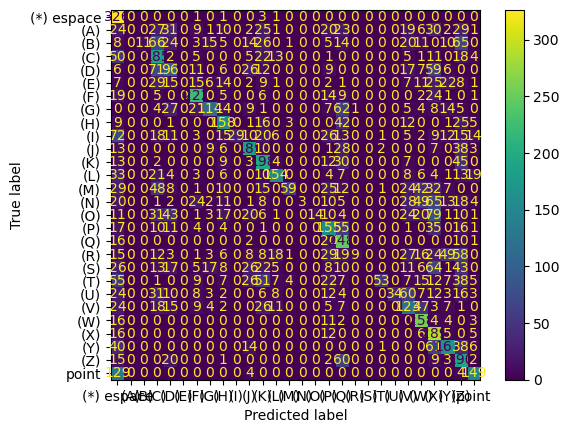

---  Cross Validation : Optimisation des hyperparamètres avec GridCV --- 
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................C=1, kernel=rbf; total time= 1.5min
[CV] END ....................................C=1, kernel=rbf; total time= 1.4min
[CV] END ....................................C=1, kernel=rbf; total time= 1.4min
[CV] END ....................................C=1, kernel=rbf; total time= 1.4min


In [ ]:

best_knn_model_resample = KNN_Model(x_resampled_cut_space, y_resampled_cut_space, 
                                    nbre_cv=10, k_max= 5, metric = 'accuracy')

best_random_forest_model_resample = RandomForest_Model(x_resampled_cut_space, y_resampled_cut_space, 
                                                       nbreTree=100, minDepth=2, maxDepth=4, minSplit=3,
                                                       maxSplit=5, nbreCV=5, metric= "accuracy")

best_svc_model_resample = SVC_Model(x_resampled_cut_space, y_resampled_cut_space, 
                                    nbreCV = 5 , C_min=1,nb_C =2)


In [ ]:
testModelForEachCat(best_knn_model_resample, all_categories, y_test_all, X_test_all, title="KNN", plot=False)

testModelForEachCat(best_random_forest_model_resample, all_categories, y_test_all, X_test_all, title="Random Forest", plot=False)

testModelForEachCat(best_svc_model_resample, all_categories, y_test_all, X_test_all, title="SVC", plot=False)

### Meilleure Optimisation du KNN

Pour des k compris entre 1 et 5, l'accuracy est très élevée (proche de 1), à voir s'il faut augmenter le nombre de k ou pas, très bonne prédiction, mais
cela semble douteux : à développer. 

Pour les random forest, on peut constater quelque chose d'intéressant, quelque soit le nombre de split, c'est surtout la profondeur de l'arbre qui semble intéressante. 

--- start cross validation Random Forest --- 

--- accuracy moyenne pour split = 3 et depth = 2 ---
0.20501366345984712


--- accuracy moyenne pour split = 3 et depth = 3 ---
0.38028213629419916


--- accuracy moyenne pour split = 3 et depth = 4 ---
0.4770781052981096


--- accuracy moyenne pour split = 4 et depth = 2 ---
0.2202565607591816


--- accuracy moyenne pour split = 4 et depth = 3 ---
0.3735382339432027


--- accuracy moyenne pour split = 4 et depth = 4 ---
0.48043027076559064


--- accuracy moyenne pour split = 5 et depth = 2 ---
0.21296612001429982


--- accuracy moyenne pour split = 5 et depth = 3 ---
0.3669890506165368


--- accuracy moyenne pour split = 5 et depth = 4 ---
0.4792612043979891

--- cross validation terminée ---
--- La meilleur accuracy est 0.48043027076559064 --- 
 Pour split = 4 et depth = 4
 
 
 Un peut donc fixer un nombre de split compris entre 4 et 5 pour le moment et regarder pour une profondeur plus importante. 


### Meilleure optimisation du random Forest

In [ ]:
rf_model = RandomForest_Model(x_resampled_cut_space, y_resampled_cut_space,
                              nbreTree=100, minDepth=4, maxDepth=10, minSplit=4, 
                              maxSplit=5, nbreCV=5, metric= "accuracy")


Bien meilleur résultats : (attention tout de même à l'over fitting même à chaque fois le test ne rentre pas en jeu dans la fonction )
    
--- split data set into train and test ---
--- start cross validation Random Forest --- 

--- accuracy moyenne pour split = 4 et depth = 4 ---
    0.47951812082286266

--- accuracy moyenne pour split = 4 et depth = 5 ---
    0.5812297241648603

--- accuracy moyenne pour split = 4 et depth = 6 ---
    0.6821834828627249

--- accuracy moyenne pour split = 4 et depth = 7 ---
    0.7862212080390603

--- accuracy moyenne pour split = 4 et depth = 8 ---
    0.8668686400924275

--- accuracy moyenne pour split = 4 et depth = 9 ---
    0.922902530600252

--- accuracy moyenne pour split = 4 et depth = 10 ---
    0.9521121904579107

--- accuracy moyenne pour split = 5 et depth = 4 ---
    0.4764926831390187

--- accuracy moyenne pour split = 5 et depth = 5 ---
    0.575876793671443

--- accuracy moyenne pour split = 5 et depth = 6 ---
    0.6881767434192765

--- accuracy moyenne pour split = 5 et depth = 7 ---
    0.7852903835565569

--- accuracy moyenne pour split = 5 et depth = 8 ---
    0.8649482761509718

--- accuracy moyenne pour split = 5 et depth = 9 ---
    0.9211570760178687

--- accuracy moyenne pour split = 5 et depth = 10 ---
    0.9497264227380136

--- cross validation terminée ---
--- La meilleur accuracy est 0.9521121904579107 --- 
     Pour split = 4 et depth = 10

## Train resamplé et test non resamplé
Les très bonnes accuracy obtenue précédemment sont en fait trompeuse, en effet l'ensemble du dataset a été resamplé. Il semble plus juste de ne ressamplé que les données train et de faire les prédictions sur des données tests qui elles n'ont pas été resamplé. 

In [ ]:
X_train_not_resampled, X_test_not_resampled, y_train_not_resampled, y_test_not_resampled = train_test_split(x_cut_space, y_cut_space, test_size=0.33, random_state=2, shuffle=True)


smote_enn_test_not_resampled = SMOTEENN(random_state=0)
x_train_resampled, y_train_resampled = smote_enn_test_not_resampled.fit_resample(X_train_not_resampled, y_train_not_resampled)

### KNN

In [ ]:

knn_resample = KNN_Model(x_train_resampled, y_train_resampled, nbre_cv=10, k_max= 15, metric = 'accuracy')

predictions_not_resample_knn = knn_resample.predict(X_test_not_resampled)   

accuracy_not_resample_knn = accuracy_score(y_test_not_resampled, predictions_not_resample_knn)

print(accuracy_not_resample_knn)

### RF

In [ ]:

rf_resample =  RandomForest_Model(x_train_resampled, y_train_resampled, nbreTree=100, minDepth=4, maxDepth=10, minSplit=4, maxSplit=5, nbreCV=5, metric= "accuracy")

predictions_not_resample = rf_resample.predict(X_test_not_resampled)   

accuracy_not_resample = accuracy_score(y_test_not_resampled, predictions_not_resample)

print(accuracy_not_resample) #0.40019474196689386




In [ ]:
svc_resample =  SVC_Model(x_train_resampled, y_train_resampled, nbreCV = 5 , C_min=1,nb_C =2)

predictions_not_resample_svc = svc_resample.predict(X_test_not_resampled)   

accuracy_not_resample_svc = accuracy_score(y_test_not_resampled, predictions_not_resample_svc)

print(accuracy_not_resample_svc)

# Deep Learning

## Sur le dataset complet 


In [ ]:
NN_Model(X_train_all, X_test_all, y_train_all, y_test_all)


- The validation accuracy is : [0.46915584802627563] 

- The training accuracy is : [0.43182727694511414]

- The validation loss is : [1.8632093667984009]

- The training loss is : [3.420698881149292]

Classification error:  53.08 %



## Sur le dataset resampled 



In [ ]:
NN_Model(x_resampled, X_test_all, y_resampled, y_test_all)

- The validation accuracy is : [0.5689935088157654]
- The training accuracy is : [0.1520247608423233]
- The validation loss is : [1.5406628847122192]
- The training loss is : [2.8868353366851807]

Classification error:  43.1 %


In [ ]:
NN_Model(x_resampled_cut_space, X_test_all, y_resampled_cut_space, y_test_all)


- The validation accuracy is : [0.4642857015132904]
- The training accuracy is : [0.07636450976133347]
- The validation loss is : [1.9020476341247559]
- The training loss is : [3.236750841140747]
- Classification error:  53.57 %


In [ ]:
NN_Model(x_train_resampled, X_test_not_resampled, y_train_resampled, y_test_not_resampled)

Résultats varient, mais valeurs proches de :
- The validation accuracy is : [0.4654332995414734]
- The training accuracy is : [0.1752208173274994]
- The validation loss is : [1.855034351348877]
- The training loss is : [3.082515239715576]
- Classification error:  53.46 %

In [ ]:
index_label = [6,41,3,33,7,4,18,3,1,3,18,4,1,68,65,4,2,34,3,33,15,18,10,33,18,8]
X_test_ordonnated = [X_test_not_resampled[i] for i in index_label]
#X_test_ordonnated = X_test_not_resampled[1:300]
def from_pred_to_text (X_test_ordonnated):
    pred_X_test_ordonnated = best_svc_model_resample.predict(X_test_ordonnated) 
    sentence = []
    for i in range(len(pred_X_test_ordonnated)):
        if len(pred_X_test_ordonnated[i])==3:
            letter = pred_X_test_ordonnated[i][1]
        elif len(pred_X_test_ordonnated[i]) == 10:
            letter = " "
        else :
            letter = "."
        sentence.append(letter)
    # Renvoie la phrase dans un fichier texte 
    with open('sentence.txt', 'a') as f:
        f.write(''.join(sentence))

from_pred_to_text(X_test_ordonnated)